# Intro
(This post is in progress) The eleventh lesson of fast.ai.

# Lesson Overview
The course may overrun (far) further than the original intended 8 lessons 

# The topics covered, briefly


# Lecture Notes
Changing the prediction equation relying on the guidance parameter to be normalised between 0 and 1 improves the image quality! Sometimes it helps a lot.
We can rescale the pred to improve image quality, we can rescale the difference between the vectors too to get a different generated image.

Another idea: why not lower the guidance_scale value over time? So at the start, to tell the model what image it needs to draw, we have guidance, but afterwards we need less. This helps too!

## DiffEdit paper:
arxiv is a preprint paper, so it contains papers before they gave been prereviewed. Regardless they are useful because you can test the concepts and code yourself, and on forums people discuss it. Waiting until peer review takes too long.

Zotero is free software. You can download papers to Zotero. 
We can open the paper in Zotero. It's better because we can annotate, tag them, edit them, sort them etc.

Reading papers is hard. The goal isn't to understand the entire paper, just the basic ideas so that we can look at the code to see how it matches, and so how we can write our own code to understand it.

Start with the abstract.
It uses text-condition diffusion, so what we've being doing.
Semantic image editing is image generation where the generated image is as similar as possible to a given input image.

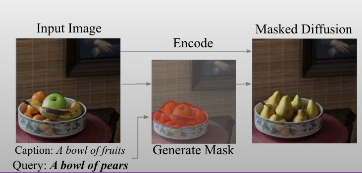

Currently techniques required you to draw a mask (the part around the thing to change). This paper generates the mask for you! 

Papers are full of citations. Don't read all of them, every paper will have more citations to read.

If we want to turn a dog into a cat, we want to keep the pose and positioning. Older papers used a mask to delete the area and regenerate, but this paper attempts to keep pose and positioning.

Read references, examples, abstract. Often skip straight to experiments. Do this so you can see the aim of the paper. You need to know the aim to understand the paper.

The related work section is important to study if you want to do a deep dive. There's a lot of repetition in the paper on the papers cited and that's fine to skip. The end part of related work is normally most interesting. If you wanted to do the best possible to get the best ideas, spending ages on related work is important.

The background section. This section is often the scariest. It's the maths behind how the model works. Noone in the world looks at the background and gets it. First youd need to know DDPM, and spend ages reading it. After that, then it makes sense. The background is meant to be a reminder of something you already know, not a place to learn it from scratch. Every diffusion paper has these equations, and lesson 9B covers them properly. The background is often read last and to look cool for reviewers. The main goal of reading it is to know the symbol's definitions so that you can understand them later.

How to read this? 
Jeremy first recommends to learn the greek alphabet. 

$\epsilon$ 

L is for the loss function.
How to understand what some symbols mean? We can use a program called mathpix.
You select anything in your screen, and it turns it into latex!
But mathpix is very expensive, but pix2tex is free!


This is good because latex is written as searchable text, put it into google.
We can also download the other formats of our paper. We can download source to download the original latex document and look at that too.

And Detexify lets you draw a symbol to tell you what it is in latex.

The L2 norm gives the subscript 2. We have a subscript 2 for L2 norm, and a top 2 for squared. 
The entire thing in the modulus just turns into Sigma(x^2)!

Trying to find what E is!

Looking at the latex paper file:


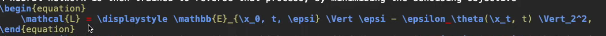

mathbb{E} we can google! It's the expected value operator. 
Expected value is a weighted average. It's Sum (prob*value) to give the average result.




epislon is distributed normally with I, the identity (look lesson 9b), but episilon 0 is a noise estimator.

Looking at the equation:
We have the noise, the prediction of it. Subtact them, square it, and find the expected value. This is all just the mean squared error. The loss function is just the mean squared error...

We reduce the value of each pixel and add noise to each pixel. And this goes so on.

Once you understand what you're looking for, the equations make sense. Remember this is a background section. It tells us what is already there and what they changed.

What we'd find is that none of the further background matters. There's only a subsection of the background we need to understand for our purposes. You don't need to read the whole thing.

 means nothing (unconditional, no prompt, "")

The diagram explaning it is often the best part of the paper.

Step 1: We make a mask based on the difference between the denoising of the original prompt (zebra) and the denoising on a new prompt (horse). 
Step 2: Take the Horse, add noise to it. 
Step 3: During inference, while we turn the noised horse, we make the background stay the same.

Theoretical analysis part Jeremy skips. People add this to get past review. This is proving why this method is better than others. 

Experimentation setup shows us what datasets they used and so on. They use metrics like CSFID and FID. We don't usually care either. They do because they want to publish papers and good metrics prove themselves.

But here we find some examples. Very cool to see and also lets you understand how good and bad the technique is in certain areas.

Limitation we realised: If you cant come up with a mask to change your image, it won't work. A bowl of fruits to a bowl of fruits purple tinged photo. We can't do this because it requires changing the entire image, but our masks only cover the core subject.

Conclusion almost never adds anything ontop of what we've already read.

Often however, the ammendixes are itneresting for more examples. Often some of the most interesting examples are there.

It's important to remember, this wasn't a carefully chosen paper, it was just the most interesting paper this week. This is how reading papers is like. The big stretch/homework is to try and implement some of this paper. To do it, lesson 9 contains what you need.

To find good papers, follow akaliz on twitter. pretty much everybody does this.

# Takeaways from how to read a paper:

# Notebook From Foundations 2


Now we need to do matrix multiplication because we have tensors ready.
Matrix multiplication is row by column. We do it for every element pair row column and that gives us one value. We do this for the entire matrix.

We do a minibatch:
5 images multiplied by the weights matrix.

We want to get the dimensions from the minibatch image store m1 and the weights.

Our resultant tensor is 5x10. This is from 5x784 by 784x10, the outer numbers.

We have a loop in a loop in a loop.
This works, but is very very slow.

We change the print options to make it easier to read.
Put this at the top of your notebooks, with numpy too.

One all the different cells work properly, select them all, copy and paste them, merge them, and turn them into a function. Still keep the old cells though, makes learning/testing easier.

This took half a second, very very long. 

Numba takes Python, and turns it into machine code. It's very easy to use!
Write at-njit at the start of a function.
Numba only works with numpy, so we use arrays instead of tensors.

Try a dot product, it taks 1/5th of a sec, because it has to compile and run. The second time, it only takes 21 microsecs, because it just has to call, not compile.
With numba, we get python to run at c speed!

We now can replace one of our loops in our loop loop loop function with a dot product compiled c call. 

test_close checks if two things give similar results. two functions.

now we try matmul again, and it's about 2000 times faster just by changing one loop with numba!

# Elementwise Ops:

Again we're using APL. It can teach you a lot about programming. 

a < b is elementwise comparison. it returns 0 and 1 for false and true.

to print easily after writing something, just put it m = ..., then next line m.

Frobenius norm:
The sum of every element squared, square rooted.
it's just m*m.sum().sqrt, because m*m is elementwise multiplication. 

For a scalar, the norm is the same as the absolute value.
You can index into matrices. 
m[2,:], is every column, row 2
m[:,2] is every row, column 2

we can just leave out the :

we can remove one of the matul lines since it's just elementwise multplication. It's a bit lower than our c code, but more general so good.

# Broadcasting

For arrays with different shapes.
We can do any operation with a scalar to do it elementwise.



# Links
- As I am doing this lesson as it is released privately live, I cannot share links to the resources.